In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 10s 0us/step


In [ ]:
!unzip '/content/train.zip'

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
 '/content/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 800 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['cat', 'dog']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu',kernel_regularizer = 'l1'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Batc  (None, 90, 90, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_34 (Conv2D)          (None, 90, 90, 32)      

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
25/25 [==============================] - 1s 40ms/step - loss: 0.7694 - accuracy: 0.7013 - val_loss: 0.8811 - val_accuracy: 0.4950
Epoch 2/100
25/25 [==============================] - 1s 36ms/step - loss: 0.7547 - accuracy: 0.6862 - val_loss: 0.8229 - val_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 1s 41ms/step - loss: 0.7401 - accuracy: 0.6938 - val_loss: 0.7924 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 1s 46ms/step - loss: 0.7333 - accuracy: 0.6938 - val_loss: 0.7898 - val_accuracy: 0.5900
Epoch 5/100
25/25 [==============================] - 1s 33ms/step - loss: 0.7207 - accuracy: 0.6850 - val_loss: 0.7968 - val_accuracy: 0.5700
Epoch 6/100
25/25 [==============================] - 1s 32ms/step - loss: 0.7026 - accuracy: 0.7138 - val_loss: 0.7483 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================] - 1s 32ms/step - loss: 0.6977 - accuracy: 0.7013 - val_loss: 0.7536 - val_accuracy: 0.5800
Epoch 

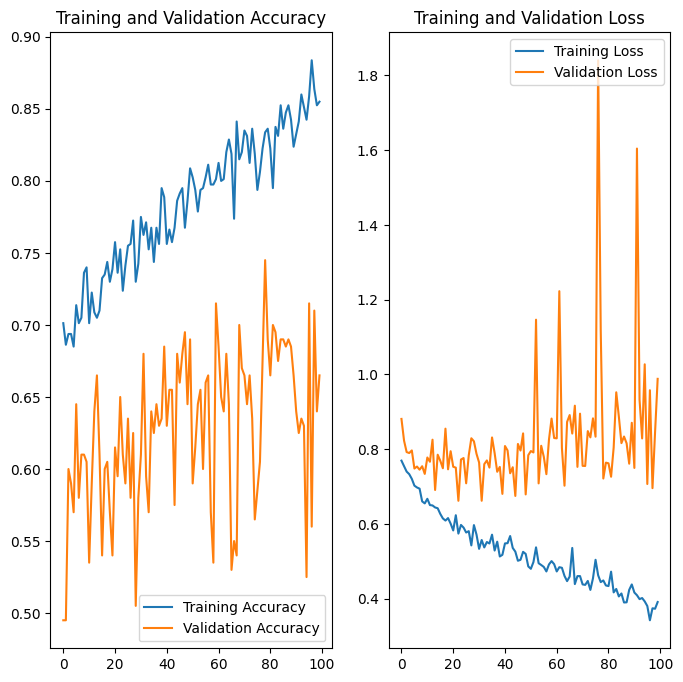

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img = load_img('/content/cat.jpg',target_size=(180,180))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array,0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 39ms/step
This image most likely belongs to dog with a 69.67 percent confidence.
